In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib

# Portfolio Analysis
#### Submission by **Maya Gusak** on *11.06.2024*

Read the **transactions** and **prices** into *pandas* DataFrames
> For now, we copy the DataFrame for **transactions** into **tx** for faster testing

In [3]:
# Read the transaction data
transactions = pd.read_csv('tx_etf.csv', parse_dates=['date']).set_index('date', drop=True)
prices = pd.read_csv('px_etf.csv', parse_dates=['Date']).set_index('Date', drop=True)

tx = transactions.iloc[0:700].copy() # otherwise we get the annoying view vs. copy error
pd.to_datetime(tx.index)

DatetimeIndex(['2005-01-03', '2005-01-03', '2005-01-03', '2005-01-03',
               '2005-01-03', '2005-01-03', '2005-01-03', '2005-01-03',
               '2005-01-03', '2005-01-03',
               ...
               '2006-02-13', '2006-02-13', '2006-02-20', '2006-02-20',
               '2006-02-20', '2006-02-20', '2006-02-20', '2006-02-20',
               '2006-02-20', '2006-02-20'],
              dtype='datetime64[ns]', name='date', length=700, freq=None)

### Portfolio Positions

In [5]:
tx['adjusted_qty'] = tx.apply(lambda row: row['qty'] if row['order'] == 'BUY' else -row['qty'], axis=1)
tx['positions'] = (tx.groupby('ticker'))['adjusted_qty'].cumsum()
positions = tx.pivot_table(index='date', columns='ticker', values='positions', fill_value=0)
positions.reset_index(inplace=False)

ticker,date,IWM,SHY,SPY,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
0,2005-01-03,2160.0,2359.0,3541.0,2081.0,2121.0,1412.0,2638.0,3074.0,2483.0,1519.0,2511.0,153.0,2719.0
1,2005-01-10,1707.0,2827.0,3274.0,2587.0,1925.0,1398.0,2974.0,3005.0,2436.0,1797.0,2419.0,459.0,2898.0
2,2005-01-17,1725.0,2931.0,3055.0,2858.0,1931.0,1381.0,2954.0,2849.0,2404.0,1791.0,2583.0,654.0,2586.0
3,2005-01-24,1798.0,3099.0,2696.0,3654.0,2199.0,1581.0,2221.0,2891.0,1919.0,1696.0,2803.0,854.0,2077.0
4,2005-01-31,1872.0,2871.0,3099.0,3043.0,2124.0,1646.0,2411.0,2843.0,1929.0,1809.0,2507.0,860.0,2208.0
5,2005-02-07,1936.0,2684.0,2964.0,3002.0,1933.0,1827.0,1936.0,2682.0,1717.0,2219.0,2811.0,1010.0,2223.0
6,2005-02-14,1728.0,2280.0,3174.0,2783.0,1891.0,1757.0,2226.0,2795.0,1697.0,2349.0,3245.0,1280.0,2434.0
7,2005-02-21,2066.0,1338.0,3450.0,2869.0,2104.0,1508.0,1942.0,3055.0,1733.0,2872.0,2989.0,1479.0,2715.0
8,2005-02-28,2082.0,717.0,3161.0,3897.0,2169.0,1846.0,1825.0,2727.0,2151.0,2843.0,2229.0,1908.0,2549.0
9,2005-03-07,2419.0,0.0,3327.0,3677.0,1824.0,1892.0,1615.0,2970.0,2142.0,3241.0,2486.0,2107.0,2675.0


#### Monthly and Annual Positions

In [7]:
positions.resample('ME').last()

ticker,IWM,SHY,SPY,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
date,,,,,,,,,,,,,
2005-01-31,1872.0,2871.0,3099.0,3043.0,2124.0,1646.0,2411.0,2843.0,1929.0,1809.0,2507.0,860.0,2208.0
2005-02-28,2082.0,717.0,3161.0,3897.0,2169.0,1846.0,1825.0,2727.0,2151.0,2843.0,2229.0,1908.0,2549.0
2005-03-31,2992.0,0.0,3621.0,3410.0,2089.0,1834.0,429.0,3499.0,1653.0,3096.0,2252.0,2531.0,2930.0
2005-04-30,2085.0,0.0,3538.0,5490.0,1962.0,3160.0,0.0,2936.0,318.0,1261.0,4084.0,3419.0,449.0
2005-05-31,1493.0,2262.0,3291.0,5016.0,157.0,1795.0,0.0,2414.0,1382.0,1260.0,3441.0,3066.0,0.0
2005-06-30,1939.0,3999.0,3031.0,3055.0,0.0,1521.0,0.0,2024.0,2136.0,751.0,3328.0,2390.0,865.0
2005-07-31,1624.0,4464.0,3307.0,2581.0,0.0,1404.0,1666.0,1461.0,2070.0,134.0,2221.0,392.0,1965.0
2005-08-31,1865.0,3965.0,3181.0,3256.0,0.0,1407.0,2239.0,1236.0,2290.0,307.0,2138.0,0.0,2090.0
2005-09-30,1789.0,4804.0,3134.0,2935.0,0.0,1512.0,1892.0,744.0,2447.0,385.0,2378.0,0.0,1072.0


In [8]:
positions.resample('YE').last()

ticker,IWM,SHY,SPY,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
date,,,,,,,,,,,,,
2005-12-31,2217.0,2997.0,3883.0,315.0,1474.0,1355.0,2503.0,2867.0,2314.0,276.0,2201.0,2033.0,1249.0
2006-12-31,2241.0,0.0,2880.0,0.0,1210.0,1380.0,0.0,0.0,1091.0,234.0,2670.0,0.0,1660.0


#### Computing the Portfolio Values (USD)

In [43]:
values = pd.DataFrame()
for date in positions.index:
    for ticker in positions.columns:
        
        
        price_date = date
        while price_date not in prices.index:
            price_date += dt.timedelta(days=1)
        
    
        values.loc[price_date, ticker] = positions.loc[date, ticker] * prices.loc[price_date, ticker]

values = values.round(2)
print(values)

                  IWM        SHY        SPY        TLT       XLB       XLE  \
2005-01-03  106416.91  138159.00  295193.19  100631.78  40789.88  28820.95   
2005-01-10   80993.41  165243.02  269985.48  125016.00  36316.10  28739.13   
2005-01-18   82678.54  171448.33  252921.03  140899.69  36631.18  29670.94   
2005-01-24   83599.39  181520.66  217744.27  181994.37  40450.64  33875.70   
2005-01-31   89644.84  168062.70  253750.49  152076.59  40000.94  36065.62   
2005-02-07   94582.61  157118.01  246619.51  153270.64  37275.44  41353.48   
2005-02-14   84247.68  133435.42  265434.23  141693.59  36836.21  41491.48   
2005-02-22   98027.17   78238.00  283542.82  141960.37  41411.64  36737.66   
2005-02-28  101338.27   41863.76  264237.53  191888.82  44065.82  47234.03   
2005-03-07  119689.89       0.00  283093.94  183339.92  37700.36  49250.10   
2005-03-14  129982.13       0.00  288775.79  153664.07  41263.24  49153.73   
2005-03-21  136781.06       0.00  283620.76  156273.09  37883.84

In [48]:
# Summary of the data
values.describe().round(2)

,IWM,SHY,SPY,TLT,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
count,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00,60.00
mean,104999.47,167044.88,282074.86,142444.50,18284.95,49335.88,28120.97,47081.01,29489.67,13315.41,44144.07,30662.32,35765.20
std,20472.85,102456.92,38179.67,84258.59,17491.55,13971.72,18985.79,20348.32,11782.16,14431.85,9309.63,28112.09,25009.74
min,70921.67,0.00,217744.27,0.00,0.00,28739.13,0.00,0.00,0.00,0.00,27800.44,0.00,0.00
25%,88587.36,109532.09,257906.74,91518.71,0.00,40725.28,5692.42,29394.92,24124.68,2445.75,37398.13,0.00,15325.80
50%,98350.47,189056.94,275108.78,150014.78,23388.16,45158.00,33817.32,56250.94,31367.08,6912.01,42666.71,23410.74,35812.69
75%,121552.96,255245.08,295273.88,178556.21,36521.74,53801.92,43964.26,62999.29,37004.99,21902.46,50221.39,53657.48,54424.43
max,153092.16,288471.98,410475.17,337461.33,44065.82,87202.85,56904.07,80430.99,52922.62,48466.85,70502.64,81613.71,79905.44


In [52]:
portfolio = values.sum(axis=1, numeric_only=True).rename_axis("Date").rename("Portfolio Value (USD)")
print(portfolio)

Date
2005-01-03     993684.81
2005-01-10    1003389.30
2005-01-18    1006929.30
2005-01-24     998219.96
2005-01-31    1006306.56
2005-02-07    1000152.05
2005-02-14    1000326.76
2005-02-22     986947.03
2005-02-28     992541.25
2005-03-07    1000424.58
2005-03-14    1005348.33
2005-03-21     996979.12
2005-03-28     999758.90
2005-04-04    1000803.62
2005-04-11     960884.27
2005-04-18    1002632.48
2005-04-25    1006512.62
2005-05-02    1004620.38
2005-05-09    1005389.11
2005-05-16    1005452.62
2005-05-23    1005714.02
2005-05-31    1000296.90
2005-06-06    1001023.82
2005-06-13    1001196.82
2005-06-20     999134.54
2005-06-27    1001169.63
2005-07-05    1004382.02
2005-07-11    1003272.33
2005-07-18     996141.80
2005-07-25     997171.82
2005-08-01     998697.00
2005-08-08     997764.73
2005-08-15    1002707.45
2005-08-22    1000757.78
2005-08-29    1004832.20
2005-09-06    1005051.50
2005-09-12     998059.23
2005-09-19     998491.85
2005-09-26    1000686.31
2005-10-03     99812

<Axes: xlabel='Date'>

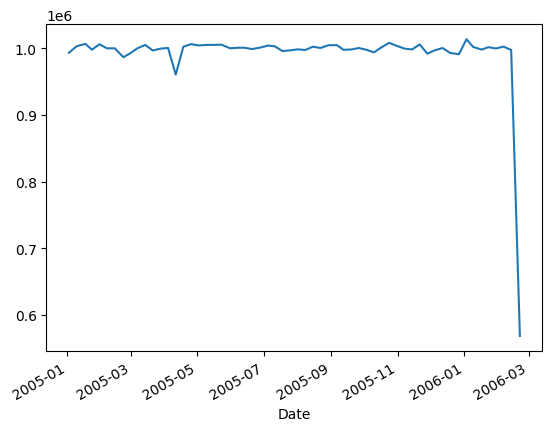

In [53]:
portfolio.plot.line()

#### Monthly Performance

In [25]:
monthly = portfolio.resample('ME').last().rename_axis("Date").rename("Monthly Value")
print(monthly)

Date
2005-01-31    1006306.56
2005-02-28     992541.25
2005-03-31     999758.90
2005-04-30    1006512.62
2005-05-31    1000296.90
2005-06-30    1001169.63
2005-07-31     997171.82
2005-08-31    1004832.20
2005-09-30    1000686.31
2005-10-31    1003971.58
2005-11-30     992269.39
2005-12-31     991320.14
2006-01-31    1000017.60
2006-02-28     568517.19
Freq: ME, Name: Monthly Value, dtype: float64


In [26]:
monthly_differences = monthly.diff().iloc[1:].dropna().rename_axis("Date").rename("Monthly Returns USD")
print(monthly_differences)

Date
2005-02-28    -13765.31
2005-03-31      7217.65
2005-04-30      6753.72
2005-05-31     -6215.72
2005-06-30       872.73
2005-07-31     -3997.81
2005-08-31      7660.38
2005-09-30     -4145.89
2005-10-31      3285.27
2005-11-30    -11702.19
2005-12-31      -949.25
2006-01-31      8697.46
2006-02-28   -431500.41
Freq: ME, Name: Monthly Returns USD, dtype: float64


In [27]:
monthly_pct_change = monthly.pct_change().iloc[1:].dropna().rename_axis("Date").rename("Monthly Returns %")
print(monthly_pct_change)


Date
2005-02-28   -0.013679
2005-03-31    0.007272
2005-04-30    0.006755
2005-05-31   -0.006176
2005-06-30    0.000872
2005-07-31   -0.003993
2005-08-31    0.007682
2005-09-30   -0.004126
2005-10-31    0.003283
2005-11-30   -0.011656
2005-12-31   -0.000957
2006-01-31    0.008774
2006-02-28   -0.431493
Freq: ME, Name: Monthly Returns %, dtype: float64


#### Annual Performance

In [28]:
annual = portfolio.resample('YE').last().rename_axis("Date").rename("Value")
print(annual)

Date
2005-12-31    991320.14
2006-12-31    568517.19
Freq: YE-DEC, Name: Value, dtype: float64


In [29]:
annual_differences = annual.diff().iloc[1:].dropna().rename_axis("Date").rename("Annual Returns USD")
print(annual_differences)

Date
2006-12-31   -422802.95
Freq: YE-DEC, Name: Annual Returns USD, dtype: float64


In [30]:
annual_pct_change = annual.pct_change().iloc[1:].dropna().rename_axis("Date").rename("Annual Returns %")
print(annual_pct_change)

Date
2006-12-31   -0.426505
Freq: YE-DEC, Name: Annual Returns %, dtype: float64


#### Risk Measures

##### Volatility
**Volatility** is a measure of the *degree of variation* in the price of a financial asset over time.
> Higher volatility indicates larger price swings and greater risk.

In [55]:
# Compute the volatility
print("Monthly volatility: ", monthly_pct_change.std().round(5))
print("Annual volatility: ", annual_pct_change.std().round(5))

Monthly volatility:  0.11976
Annual volatility:  nan


##### Value at Risk (VaR) 
**VaR** is a statistical measure that estimates the maximum potential loss of a portfolio over a specified time period at a given confidence level.
> A higher VaR indicates greater potential loss and risk.

In [33]:
# Compute the Value at Risk (VaR)
confidence_level = 0.95
print("Monthly 95% VaR: ", monthly_pct_change.quantile(1 - confidence_level).round(5))
print("Annual 95% VaR: ", annual_pct_change.quantile(1 - confidence_level).round(5))

Monthly 95% VaR:  -0.1808
Annual 95% VaR:  -0.4265


##### Sharpe Ratio
**The Sharpe Ratio** is a measure of risk-adjusted return that quantifies the excess return earned per unit of risk.
> A higher Sharpe Ratio indicates better risk-adjusted performance.

In [40]:
# Sharpe Ratio: measures the risk-adjusted return
risk_free_rate = 0.01  # Example risk-free rate
sharpe_ratio = (monthly_pct_change.mean() - risk_free_rate) / monthly_pct_change.std()
print("Monthly Sharpe Ratio 1% risk free rate: ", sharpe_ratio.round(5))
sharpe_ratio = (annual_pct_change.mean() - risk_free_rate) / annual_pct_change.std()
print("Annual Sharpe Ratio 1% risk free rate: ", sharpe_ratio.round(5))

Monthly Sharpe Ratio 1% risk free rate:  -0.36447
Annual Sharpe Ratio 1% risk free rate:  nan


##### The Sortino Ratio
**The Sortino Ratio** is a measure of risk-adjusted return that assesses the excess return per unit of downside risk.
> A higher Sortino Ratio indicates better risk-adjusted performance.

In [41]:
# Sortino Ratio: similar to the Sharpe Ratio, but only considers downside risk
downside_monthly_returns = monthly_pct_change.loc[lambda x: x < 0]
sortino_ratio = (monthly_pct_change.mean() - risk_free_rate) / downside_monthly_returns.std()
print("Sortino ratio (sampled monthly): ", sortino_ratio.round(5))
downside_annual_returns = annual_pct_change.loc[lambda x: x < 0]
sortino_ratio = (annual_pct_change.mean() - risk_free_rate) / downside_annual_returns.std()
print("Sortino ratio (sampled annually): ", sortino_ratio.round(5))

Sortino ratio (sampled monthly):  -0.2718
Sortino ratio (sampled annually):  nan


##### Maximum drawdown
**The max drawdown** is the maximum loss from a peak to a trough of a portfolio or asset
> A larger maximum drawdown indicates a greater decline in value and higher risk.

In [42]:
# Maximum drawdown: the largest peak-to-trough decline in the portfolio value.
cumulative_returns = (1 + monthly_pct_change).cumprod()
peak = cumulative_returns.cummax()
drawdown = (cumulative_returns - peak) / peak
max_drawdown = drawdown.min()
print("Max drawdown (sampled monthly): ", max_drawdown.round(5))

cumulative_returns = (1 + annual_pct_change).cumprod()
peak = cumulative_returns.cummax()
drawdown = (cumulative_returns - peak) / peak
max_drawdown = drawdown.min()
print("Max drawdown (sampled annually): ", max_drawdown.round(5))

Max drawdown (sampled monthly):  -0.43516
Max drawdown (sampled annually):  0.0
